# Week 10 handin

## 01 Assignment
1. load 'data/iris_data.csv' into a dataframe (use decimal=',') and remove the 2 `Petal` columns. Now we are left with a 2D feature space
2. get unique labels (Species column)
3. plot with a scatter plot each iris flower sample colored by label (3 different colors)
![image.png](attachment:image.png)
4. use: `MeanShift` and `estimate_bandwidth` from `sklearn.cluster` to first estimate bandwidth and then get the clusters (HINT: estimate_bandwidth() takes an argument: `quantile` set it to `0.2` for best result)
5. print out labels, cluster centers and number of clusters (as returned from the MeanShift function)
5. create a new scatter plot where each flower is colored according to cluster label
6. add a dot for the cluster centers
7. Compare the 2 plots (colored by actual labels vs. colored by cluster label)
8. Try changing the 'quantile' argument to 0.15 and see what happens to your cluster plot.

## 02 Status

Tasks were completed

## 03 Solution

In [25]:
import pandas as pd
data = "../../data/iris_data.csv"
df = pd.read_csv(data, decimal = ',')
df.drop(['Petal length','Petal width'],'columns',inplace=True)
df

,Sepal length,Sepal width,Species
0,5.1,3.5,I. setosa
1,4.9,3.0,I. setosa
2,4.7,3.2,I. setosa
3,4.6,3.1,I. setosa
4,5.0,3.6,I. setosa
...,...,...,...
145,6.7,3.0,I. virginica
146,6.3,2.5,I. virginica
147,6.5,3.0,I. virginica
148,6.2,3.4,I. virginica


In [26]:
import numpy as np

species = np.unique(df["Species"])

species

array(['I. setosa', 'I. versicolor', 'I. virginica'], dtype=object)

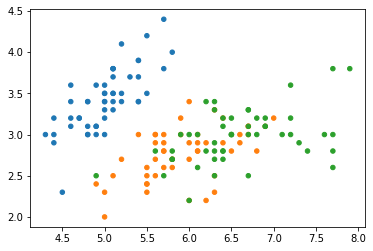

In [27]:
import matplotlib.pyplot as plt

plt.figure()

for s in species:
    plt.scatter(x=df["Sepal length"], y=df["Sepal width"],s=(df["Species"] == s) * 20)

In [ ]:
df.drop(['Species'],'columns',inplace=True)

In [29]:
from sklearn import preprocessing
from sklearn.cluster import MeanShift
from sklearn.cluster import estimate_bandwidth

estimate = estimate_bandwidth(df, quantile=0.15)
print("estimated bandwith: " + str(estimate))

ms = MeanShift(estimate)
ms.fit(df)
labels = ms.labels_
clusters = ms.cluster_centers_
n_clusters = len(np.unique(labels))

print('labels:\n', labels)
print('\n\nCluster centers:\n', clusters)
print('\n\nnumber of clusters:', n_clusters)

estimated bandwith: 0.4782250984532596
labels:
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 3 1 1 1 1 1 1 1 1 2 0 2 3 0 0 0 3 0 3 3 0 0 0 0 0 0 0 0 3 0 0 0 0
 0 0 2 0 0 0 3 3 0 0 1 0 0 0 0 3 3 0 0 3 0 0 0 0 3 0 0 0 2 0 0 2 3 2 0 4 0
 0 2 0 0 0 0 4 2 0 2 0 2 0 0 2 0 0 0 2 2 4 0 0 0 2 0 0 0 2 0 2 0 2 0 0 0 0
 0 0]


Cluster centers:
 [[6.15333333 2.88666667]
 [4.96388889 3.375     ]
 [7.43333333 2.92222222]
 [4.94285714 2.38571429]
 [7.8        3.8       ]]


number of clusters: 5


Text(0.5, 1.0, 'Estimated number of clusters: 5')

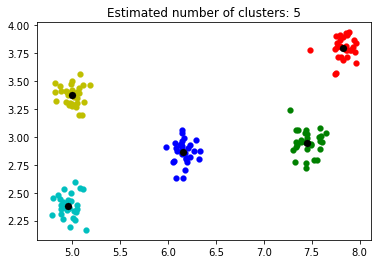

In [31]:
from itertools import cycle
from sklearn.datasets import make_blobs

data2, _ = make_blobs(n_samples=len(df), centers=clusters, cluster_std=0.1)

ms.fit(data2)
labels = ms.labels_
clusters = ms.cluster_centers_
n_clusters = len(np.unique(labels))

figure = plt.figure()
ax = figure.add_subplot(111)

colors = cycle('rgbyc')
for k, col in zip(range(n_clusters), colors):
    members = (labels == k)
    cluster = clusters[k]
    
    x, y = data2[members,0], data2[members,1]
    ax.scatter(x, y, c=col, linewidth=0.2)
    
    ax.scatter(cluster[0], cluster[1], c='k', s=50, linewidth=0.2)
    
plt.title('Estimated number of clusters: {}'.format(n_clusters))